In [1]:
import pandas as pd
import numpy as np
from yahist import Hist1D
import matplotlib.pyplot as plt

## 1D histograms

A histogram object is a collection of bin counts, edges, (potentially asymmetric) errors, and maybe some metadata

In [2]:
Hist1D().__dict__

{'_counts': array([0.]),
 '_edges': array([0., 1.]),
 '_errors': array([0.]),
 '_errors_up': None,
 '_errors_down': None,
 '_metadata': {}}

Constructing a `Hist1D` object uses the full `np.histogram` constructor under the hood. The `metadata` kwarg is attached to the histogram as metadata.

Make two histograms (`num`erator and `den`ominator) which are filled with some random numbers.

In [3]:
bins = np.linspace(-3,3,31)
v = np.random.normal(0,1,2000)
num = Hist1D(v[:len(v)//2],bins=bins,label="num", metadata=dict(myattr=2))
den = Hist1D(v[:len(v)//1],bins=bins,label="den")

In [4]:
num.metadata

{'label': 'num', 'myattr': 2}

In the terminal, the `__repr__` prints out bin counts and errors.

In [5]:
print((num/den).rebin(3))

[ 1.04 ± 0.51    1.46 ± 0.34    1.51 ± 0.20    1.63 ± 0.16    1.46 ± 0.12
  1.45 ± 0.12    1.47 ± 0.14    1.63 ± 0.23    1.62 ± 0.46    1.33 ± 0.57]


In a notebook, this is prettily formatted into an HTML table.
An svg plot without labels/formatting is drawn for cursory checks. The svg creation and rendering is nearly instant (less than a few ms), as opposed to a proper plot which renders and rasterizes many objects.

In [6]:
num

[ 4.00 ± 2.00    3.00 ± 1.73    0.00 ± 0.00   10.00 ± 3.16   12.00 ± 3.46
  6.00 ± 2.45   20.00 ± 4.47   30.00 ± 5.48   43.00 ± 6.56   53.00 ± 7.28
 49.00 ± 7.00   67.00 ± 8.19   64.00 ± 8.00   87.00 ± 9.33   71.00 ± 8.43
 80.00 ± 8.94   61.00 ± 7.81   61.00 ± 7.81   61.00 ± 7.81   48.00 ± 6.93
 48.00 ± 6.93   32.00 ± 5.66   29.00 ± 5.39   26.00 ± 5.10   14.00 ± 3.74
  3.00 ± 1.73   10.00 ± 3.16    3.00 ± 1.73    2.00 ± 1.41    3.00 ± 1.73]

Or, just explicitly plot it with matplotlib.

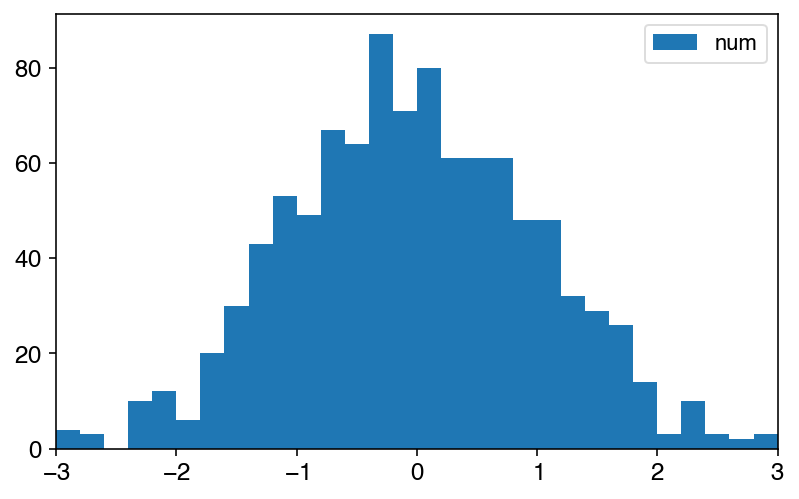

In [7]:
num.plot()

Change the style and show bin counts with some more options.

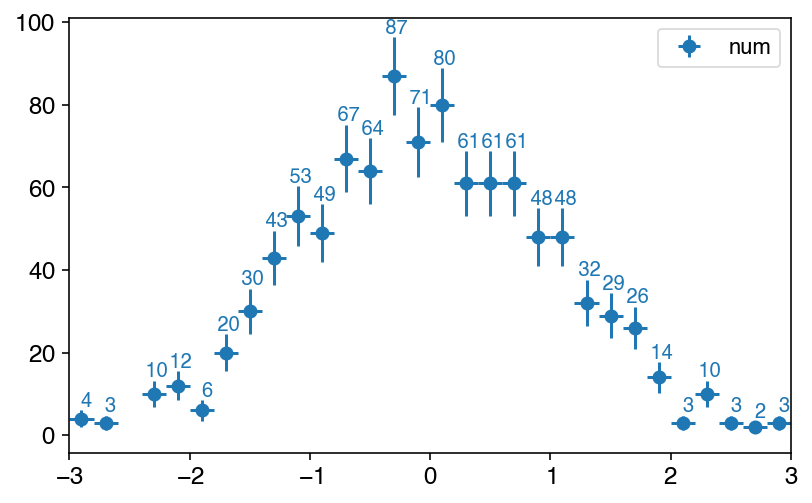

In [8]:
num.plot(show_errors=True,show_counts=True)

If you like pretty things...

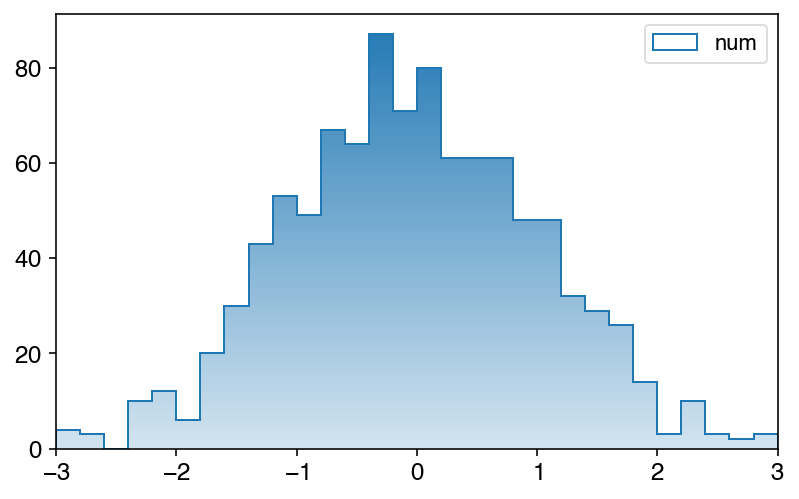

In [9]:
num.plot(gradient=True)

Do math with the histograms and merge 3 bins into one

In [10]:
2*(num/den).rebin(3)

[ 2.09 ± 1.03    2.92 ± 0.69    3.02 ± 0.39    3.26 ± 0.31    2.92 ± 0.24
  2.89 ± 0.25    2.93 ± 0.29    3.26 ± 0.46    3.25 ± 0.93    2.66 ± 1.14]

Make a more complicated plot with a ratio panel.

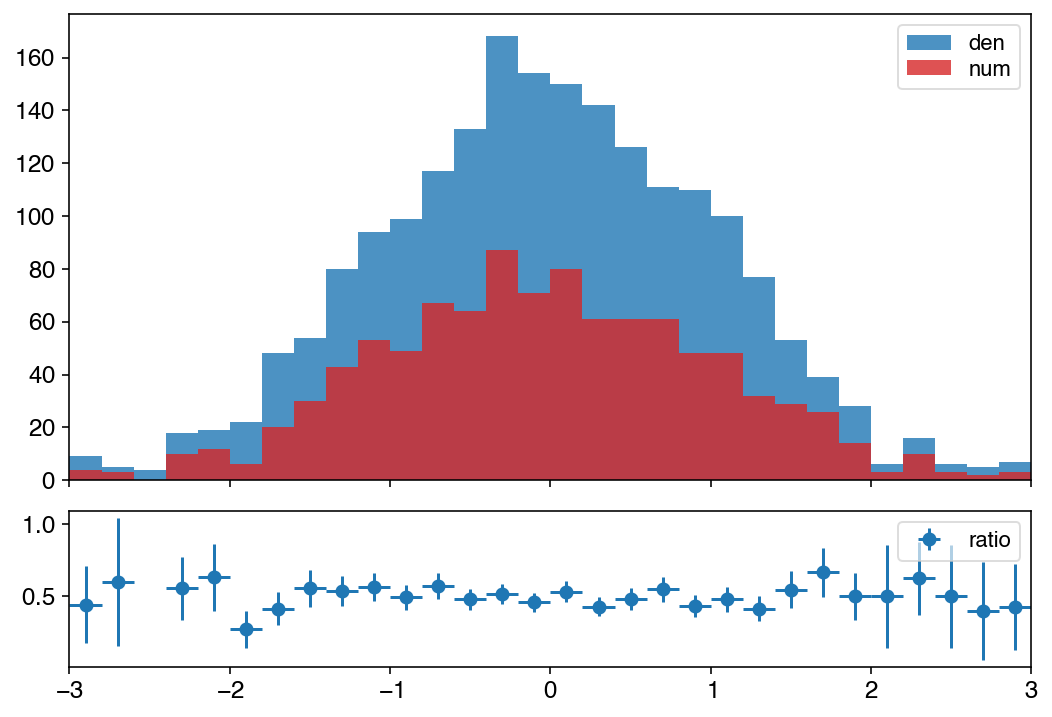

In [11]:
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(8,6),gridspec_kw=dict(height_ratios=[3, 1]))
den.plot(ax=ax1,alpha=0.8,color="C0")
num.plot(ax=ax1,alpha=0.8,color="C3")
(num/den).plot(ax=ax2,show_errors=True,label="ratio")

Generate histograms from `scipy.stats` random distributions quickly

In [12]:
Hist1D.from_random("expon")

[4710.00 ± 68.63   4431.00 ± 66.57   4241.00 ± 65.12   3946.00 ± 62.82
 3937.00 ± 62.75   3656.00 ± 60.46   3397.00 ± 58.28   3221.00 ± 56.75
 3246.00 ± 56.97   3004.00 ± 54.81   2950.00 ± 54.31   2664.00 ± 51.61
 2561.00 ± 50.61   2491.00 ± 49.91   2340.00 ± 48.37   2239.00 ± 47.32
 2165.00 ± 46.53   2114.00 ± 45.98   1984.00 ± 44.54   1862.00 ± 43.15
 1771.00 ± 42.08   1678.00 ± 40.96   1716.00 ± 41.42   1632.00 ± 40.40
 1474.00 ± 38.39   1442.00 ± 37.97   1285.00 ± 35.85   1229.00 ± 35.06
 1222.00 ± 34.96   1205.00 ± 34.71   1062.00 ± 32.59   1059.00 ± 32.54
 1078.00 ± 32.83   1007.00 ± 31.73   901.00 ± 30.02   882.00 ± 29.70
 823.00 ± 28.69   844.00 ± 29.05   802.00 ± 28.32   721.00 ± 26.85
 674.00 ± 25.96   615.00 ± 24.80   622.00 ± 24.94   597.00 ± 24.43
 557.00 ± 23.60   584.00 ± 24.17   459.00 ± 21.42   520.00 ± 22.80
 453.00 ± 21.28   463.00 ± 21.52   444.00 ± 21.07   419.00 ± 20.47
 405.00 ± 20.12   381.00 ± 19.52   331.00 ± 18.19   353.00 ± 18.79
 330.00 ± 18.17   318.00 ± 17.83   301.00 ± 17.35   287.00 ± 16.94
 276.00 ± 16.61   259.00 ± 16.09   240.00 ± 15.49   237.00 ± 15.39
 231.00 ± 15.20   204.00 ± 14.28   198.00 ± 14.07   166.00 ± 12.88
 189.00 ± 13.75   190.00 ± 13.78   193.00 ± 13.89   156.00 ± 12.49
 147.00 ± 12.12   150.00 ± 12.25   128.00 ± 11.31   134.00 ± 11.58
 126.00 ± 11.22   118.00 ± 10.86   98.00 ± 9.90   115.00 ± 10.72
 95.00 ± 9.75   109.00 ± 10.44   89.00 ± 9.43   70.00 ± 8.37
 105.00 ± 10.25   88.00 ± 9.38   84.00 ± 9.17   73.00 ± 8.54
 64.00 ± 8.00   106.00 ± 10.30   90.00 ± 9.49   62.00 ± 7.87
 79.00 ± 8.89   66.00 ± 8.12   40.00 ± 6.32   38.00 ± 6.16   41.00 ± 6.40
 40.00 ± 6.32   36.00 ± 6.00   46.00 ± 6.78   54.00 ± 7.35   33.00 ± 5.74
 36.00 ± 6.00   37.00 ± 6.08   33.00 ± 5.74   29.00 ± 5.39   30.00 ± 5.48
 28.00 ± 5.29   31.00 ± 5.57   25.00 ± 5.00   34.00 ± 5.83   26.00 ± 5.10
 24.00 ± 4.90   24.00 ± 4.90   15.00 ± 3.87   28.00 ± 5.29   17.00 ± 4.12
 16.00 ± 4.00   26.00 ± 5.10   12.00 ± 3.46   11.00 ± 3.32   17.00 ± 4.12
 12.00 ± 3.46   25.00 ± 5.00    9.00 ± 3.00   14.00 ± 3.74    8.00 ± 2.83
 18.00 ± 4.24    5.00 ± 2.24    8.00 ± 2.83    7.00 ± 2.65   16.00 ± 4.00
 13.00 ± 3.61    8.00 ± 2.83   11.00 ± 3.32   10.00 ± 3.16    6.00 ± 2.45
  6.00 ± 2.45   10.00 ± 3.16    6.00 ± 2.45    7.00 ± 2.65    2.00 ± 1.41
  8.00 ± 2.83    8.00 ± 2.83    3.00 ± 1.73    8.00 ± 2.83    5.00 ± 2.24
  4.00 ± 2.00    8.00 ± 2.83    6.00 ± 2.45    2.00 ± 1.41    3.00 ± 1.73
  1.00 ± 1.00    2.00 ± 1.41    6.00 ± 2.45    5.00 ± 2.24    4.00 ± 2.00
  3.00 ± 1.73    2.00 ± 1.41    1.00 ± 1.00    1.00 ± 1.00    2.00 ± 1.41
  4.00 ± 2.00    3.00 ± 1.73    1.00 ± 1.00    3.00 ± 1.73    0.00 ± 0.00
  1.00 ± 1.00    5.00 ± 2.24    2.00 ± 1.41    1.00 ± 1.00    2.00 ± 1.41
  4.00 ± 2.00    1.00 ± 1.00    1.00 ± 1.00    1.00 ± 1.00    0.00 ± 0.00
  1.00 ± 1.00    1.00 ± 1.00    3.00 ± 1.73    1.00 ± 1.00    2.00 ± 1.41
  0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    2.00 ± 1.41    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    1.00 ± 1.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  1.00 ± 1.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00
  0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0

In [13]:
Hist1D.from_random("norm", bins="100,-3,3", size=1e3)

[ 0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00
  1.00 ± 1.00    2.00 ± 1.41    0.00 ± 0.00    3.00 ± 1.73    0.00 ± 0.00
  1.00 ± 1.00    1.00 ± 1.00    4.00 ± 2.00    2.00 ± 1.41    4.00 ± 2.00
  0.00 ± 0.00    9.00 ± 3.00    4.00 ± 2.00    3.00 ± 1.73    6.00 ± 2.45
  7.00 ± 2.65    6.00 ± 2.45    9.00 ± 3.00    2.00 ± 1.41    3.00 ± 1.73
  9.00 ± 3.00    9.00 ± 3.00    7.00 ± 2.65   10.00 ± 3.16    9.00 ± 3.00
 16.00 ± 4.00    7.00 ± 2.65   11.00 ± 3.32   14.00 ± 3.74   13.00 ± 3.61
 13.00 ± 3.61   19.00 ± 4.36   14.00 ± 3.74   22.00 ± 4.69   20.00 ± 4.47
 16.00 ± 4.00   16.00 ± 4.00   20.00 ± 4.47   28.00 ± 5.29   21.00 ± 4.58
 15.00 ± 3.87   21.00 ± 4.58   21.00 ± 4.58   27.00 ± 5.20   32.00 ± 5.66
 33.00 ± 5.74   25.00 ± 5.00   22.00 ± 4.69   23.00 ± 4.80   29.00 ± 5.39
 12.00 ± 3.46   19.00 ± 4.36   20.00 ± 4.47   27.00 ± 5.20   16.00 ± 4.00
 24.00 ± 4.90   24.00 ± 4.90   17.00 ± 4.12   22.00 ± 4.69    9.00 ± 3.00
 14.00 ± 3.74   16.00 ± 4.00   19.00 ± 4.36   14.00 ± 3.74   10.00 ± 3.16
  2.00 ± 1.41   13.00 ± 3.61   10.00 ± 3.16   12.00 ± 3.46   10.00 ± 3.16
 12.00 ± 3.46    9.00 ± 3.00    7.00 ± 2.65    7.00 ± 2.65    2.00 ± 1.41
  3.00 ± 1.73    2.00 ± 1.41    6.00 ± 2.45    5.00 ± 2.24    7.00 ± 2.65
  4.00 ± 2.00    2.00 ± 1.41    3.00 ± 1.73    0.00 ± 0.00    3.00 ± 1.73
  3.00 ± 1.73    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    2.00 ± 1.41]

Histogram objects are pickle-able, and can be de/serialized from/to json.

In [14]:
num.to_json()

# or num.to_json("test.json")
#    num = Hist1D.from_json("test.json")

'{"_counts": [4.0, 3.0, 0.0, 10.0, 12.0, 6.0, 20.0, 30.0, 43.0, 53.0, 49.0, 67.0, 64.0, 87.0, 71.0, 80.0, 61.0, 61.0, 61.0, 48.0, 48.0, 32.0, 29.0, 26.0, 14.0, 3.0, 10.0, 3.0, 2.0, 3.0], "_edges": [-3.0, -2.8, -2.6, -2.4, -2.2, -2.0, -1.7999999999999998, -1.5999999999999999, -1.4, -1.2, -1.0, -0.7999999999999998, -0.5999999999999996, -0.3999999999999999, -0.19999999999999973, 0.0, 0.20000000000000018, 0.40000000000000036, 0.6000000000000001, 0.8000000000000003, 1.0, 1.2000000000000002, 1.4000000000000004, 1.6000000000000005, 1.8000000000000007, 2.0, 2.2, 2.4000000000000004, 2.6000000000000005, 2.8000000000000007, 3.0], "_errors": [2.0, 1.7320508075688772, 0.0, 3.1622776601683795, 3.4641016151377544, 2.449489742783178, 4.47213595499958, 5.477225575051661, 6.557438524302, 7.280109889280518, 7.0, 8.18535277187245, 8.0, 9.327379053088816, 8.426149773176359, 8.94427190999916, 7.810249675906654, 7.810249675906654, 7.810249675906654, 6.928203230275509, 6.928203230275509, 5.656854249492381, 5.

In [15]:
Hist1D.from_json(num.to_json())

[ 4.00 ± 2.00    3.00 ± 1.73    0.00 ± 0.00   10.00 ± 3.16   12.00 ± 3.46
  6.00 ± 2.45   20.00 ± 4.47   30.00 ± 5.48   43.00 ± 6.56   53.00 ± 7.28
 49.00 ± 7.00   67.00 ± 8.19   64.00 ± 8.00   87.00 ± 9.33   71.00 ± 8.43
 80.00 ± 8.94   61.00 ± 7.81   61.00 ± 7.81   61.00 ± 7.81   48.00 ± 6.93
 48.00 ± 6.93   32.00 ± 5.66   29.00 ± 5.39   26.00 ± 5.10   14.00 ± 3.74
  3.00 ± 1.73   10.00 ± 3.16    3.00 ± 1.73    2.00 ± 1.41    3.00 ± 1.73]

## 2D histograms

2D histograms are basically wrapped around `np.histogram2d()`. The string representation has a matrix of counts and errors.

In [16]:
from yahist import Hist2D

N = 50000
v = lambda:np.random.normal(0,1,N)
lsp = np.linspace
h = Hist2D(np.c_[v(), v()], bins=[lsp(-3,3,51), lsp(-3,3,51)])

print(str(h))

[[ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    1.00 ± 1.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 ...
 [ 1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]]


Similar to the 1D object, the HTML representation for 2D histograms is a rendered plot.

In [17]:
h

[[ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    1.00 ± 1.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 ...
 [ 1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]]

Or just plot it explicitly with matplotlib. kwargs are passed to `pcolorfast`, except for a few which are available for convenience: `logz`, ...

(<matplotlib.image.AxesImage at 0x1142272b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1141fbc88>)

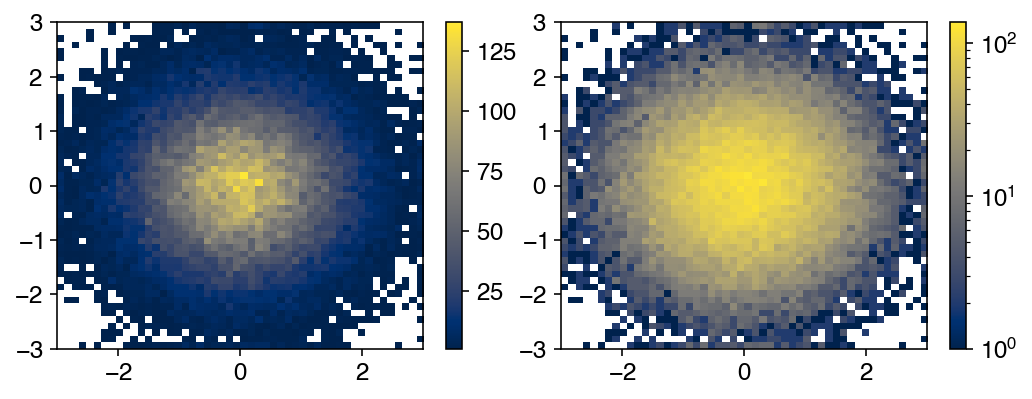

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3))
h.plot(ax=ax1, cmap="cividis")
h.plot(ax=ax2, cmap="cividis", logz=True)

Chain a few methods together. `projection("x")` projects the bin contents onto the x-axis by summing, returning a `Hist1D`.

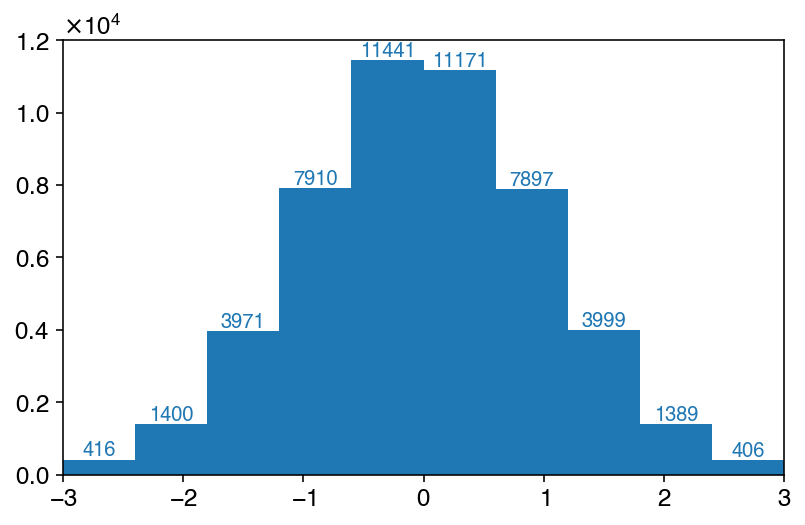

In [19]:
(h
 .rebin(5)
 .projection("x")
 .plot(show_counts=True)
)

`profile("x")` profiles/integrates out the y dimension. That is, for each constant-x slice, the profiled value is the mean y value. In the case for this symmetric gaussian, they are close to 0.

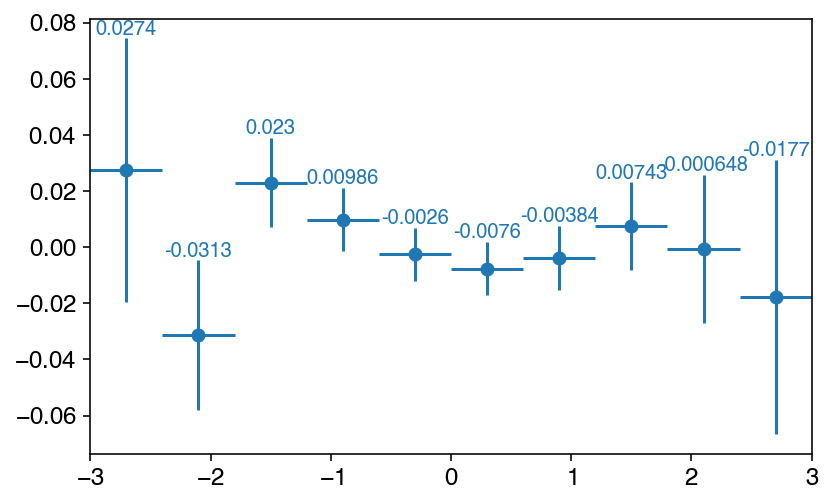

In [20]:
(h
 .rebin(5)
 .profile("x")
 .plot(show_counts=True,show_errors=True, counts_fmt_func="{:.3g}".format)
)

Hist2D is aware of pandas DataFrame column names.

In [21]:
df = pd.DataFrame(np.random.normal(size=(5000, 3)), columns=["xlabel", "ylabel", "zlabel"])
df.head()

,xlabel,ylabel,zlabel
0,-2.031449,1.198983,2.389334
1,-1.056849,-0.621009,-0.551363
2,0.846099,1.957662,0.273046
3,-0.218539,-0.918625,0.583701
4,0.170595,2.299100,0.104887


(<matplotlib.image.AxesImage at 0x114d160f0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x122ef6c88>)

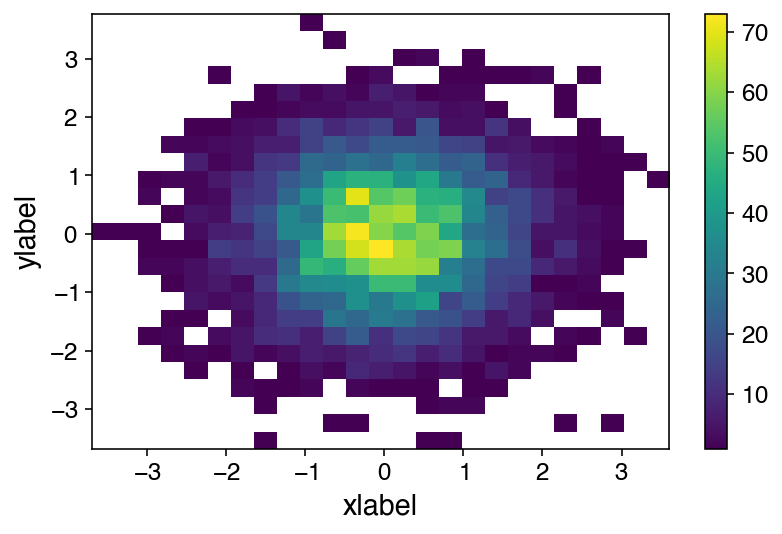

In [22]:
Hist2D(df[["xlabel","ylabel"]], bins=25).plot()

## Stacking histograms

The `bottom` kwarg of `plt.hist()` allows one to easily stack histograms, so the wrapper code in `utils.plot_stack` is pretty simple.

In [23]:
from yahist.utils import plot_stack
import inspect
print(inspect.getsource(plot_stack))

def plot_stack(hists, **kwargs):
    """
    Plots a list of `Hist1D` objects as a stack

    Parameters
    ----------
    hists : list of `Hist1D` objects
    kwargs : passed to `Hist1D.plot()`
    """
    bottom = 0.0
    for h in hists:
        h.plot(bottom=bottom, **kwargs)
        bottom += h.counts



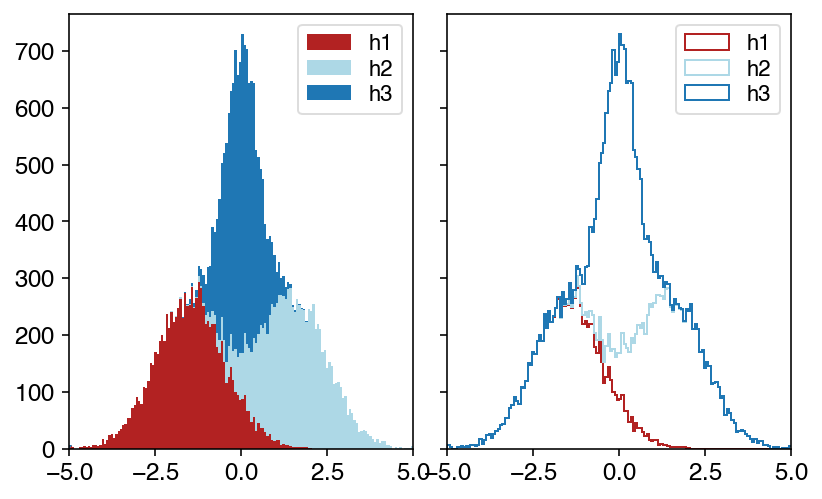

In [24]:
h1 = Hist1D(np.random.normal(-1.5,1,10000), bins="150,-5,5", color="firebrick", label="h1")
h2 = Hist1D(np.random.normal(1.5,1,10000), bins="150,-5,5", color="lightblue", label="h2")
h3 = Hist1D(np.random.normal(0.0,0.5,10000), bins="150,-5,5", label="h3")
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
plot_stack([h1,h2,h3],ax=ax1)
plot_stack([h1,h2,h3],histtype="step",ax=ax2)

## Simple fits

While this is not a fitting package, there is a function for conveniently fitting a user-provided 
function to a histogram, taking into account the histogram errors. The function is a wrapper around `scipy.optimize.curve_fit`.

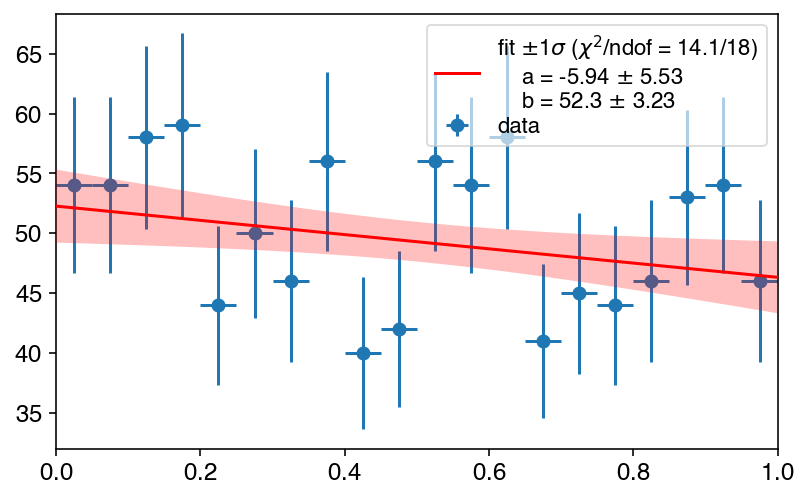

In [25]:
np.random.seed(42)
h = Hist1D(np.random.random(1000), bins="20,0,1")
h.plot(show_errors=True, label="data")
# parses an expression string, assuming the main parameter is `x`
res = h.fit("a*x+b")
# OR h.fit(lambda x,a,b: a*x+b)

Note that `curve_fit` minimizes chi2 by default. To minimize log likelihood, pass the `likelihood=True` option. In the limit of large counts, both are equivalent. Log likelihood is more correct for low counts, especially when some bins are empty.

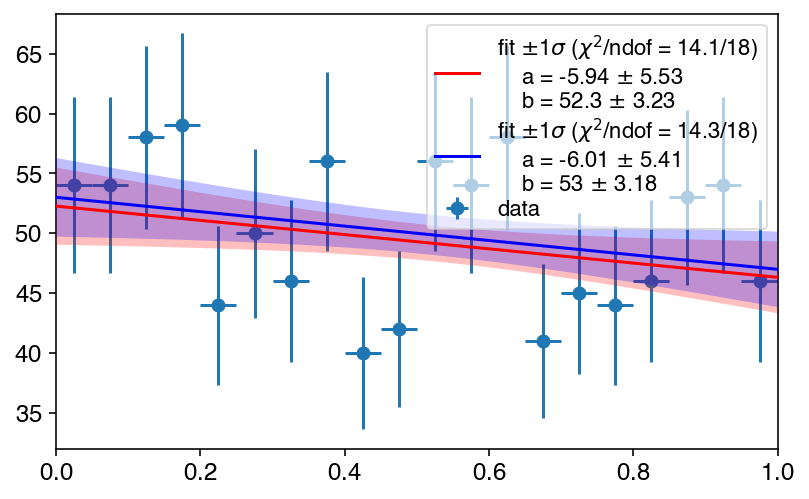

In [26]:
h.plot(show_errors=True, label="data")
res = h.fit("a*x+b", color="r")
res = h.fit("a*x+b", color="b", likelihood=True)

Or a slightly more complicated fit, with a ratio panel...

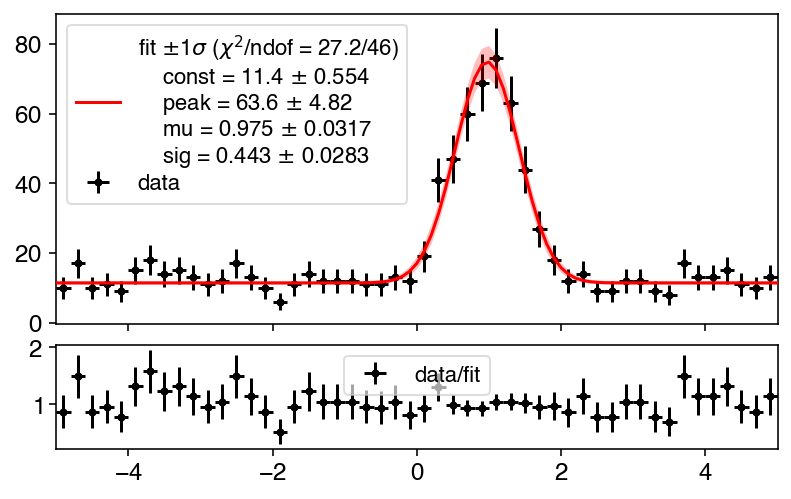

In [27]:
np.random.seed(42)

fig,(ax1,ax2) = plt.subplots(2,sharex=True,gridspec_kw=dict(height_ratios=[3, 1]))

bins = "50,-5,5"
hdata = (Hist1D(np.random.normal(1,0.5,350), bins=bins) 
         + Hist1D(10*np.random.random(600)-5, bins=bins))
hdata.plot(ax=ax1,show_errors=True, color="k",markersize=3,label="data")

result = hdata.fit("const+peak*np.exp(-(x-mu)**2/(2*sig**2))", ax=ax1)

ratio = (hdata/result["hfit"])
ratio.plot(ax=ax2, color="k", label="data/fit", show_errors=True,markersize=3)

The returned `result` object has an HTML representation for notebooks showing the fit parameters. The object itself is a `dict` containing information about the parameters and including a `Hist1D` object of the fit. 

In [28]:
result

parameter,value
const,11.4 ± 0.554
peak,63.57 ± 4.824
mu,0.9748 ± 0.03169
sig,0.4427 ± 0.02828


In [29]:
dict(result)

{'parnames': ('const', 'peak', 'mu', 'sig'),
 'parvalues': array([11.40179986, 63.57346636,  0.97481757,  0.44270051]),
 'parerrors': array([0.55399751, 4.82432105, 0.03169182, 0.02827723]),
 'chi2': 27.177204062645963,
 'ndof': 46,
 'hfit': [11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.41 ± 0.56   11.45 ± 0.55   11.65 ± 0.56   12.41 ± 0.71   14.74 ± 1.28
  20.42 ± 2.21   31.30 ± 3.07   47.17 ± 3.51   63.83 ± 3.98   74.07 ± 4.61
  72.48 ± 4.50   59.94 ± 3.82   42.86 ± 3.39   28.02 ± 2.82   18.56 ± 1.89
  13.92 ± 1.05   12.12 ± 0.63   11.57 ± 0.55   11.43 ± 0.56   11.41 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56]}

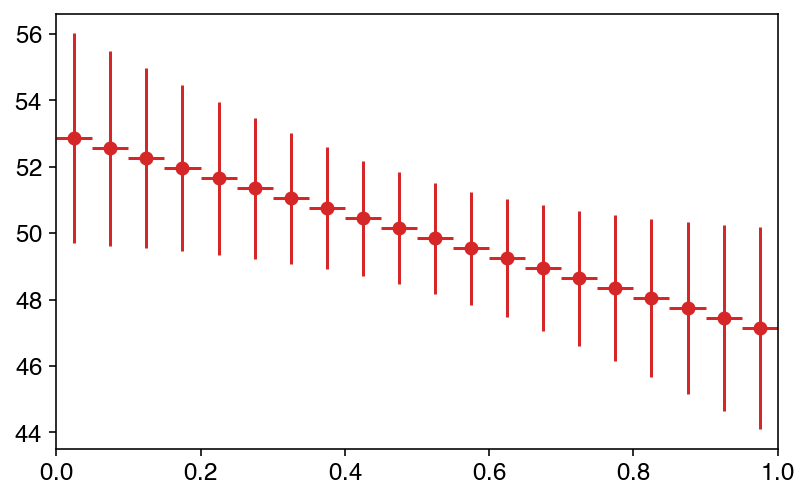

In [30]:
res["hfit"].plot(show_errors=True,color="C3")

## Fluent interface

This is kind of a pointless example, but it shows the fluent interface. `plot` and `fit` are usually methods used terminally,
but one can use the `return_self` keyword argument to plot and return the `Hist` object instead of the matplotlib ones to allow further chaining.

/Users/namin/sandbox/dev/yahist/yahist/hist2d.py:176: RuntimeWarning: invalid value encountered in true_divide
  r_val = num / den
/Users/namin/sandbox/dev/yahist/yahist/hist2d.py:177: RuntimeWarning: invalid value encountered in true_divide
  r_err = ((num_err / den) ** 2 + (den_err * num / den ** 2.0) ** 2.0) ** 0.5


parameter,value
a,0.00539 ± 0.003165
b,0.002716 ± 0.003016


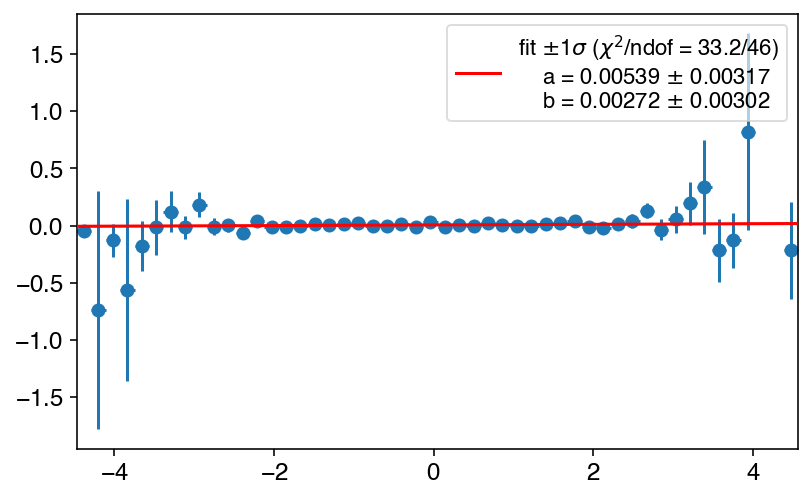

In [31]:
(Hist2D
 .from_random("norm", bins=100) # 2d gaussian centered at (0,0)
 .rebin(2) # combine pairs of bins into one
 .transpose() # flip x/y
 .normalize() # scale counts so that integral = 1
 .profile("x") # profile out y axis, giving a Hist1D
 .plot(show_errors=True, return_self=True) # plot and return self object
 .fit("a+b*x") # fit line and return fit object
)